***
# Réactif limitant
***

<div class="alert alert-block alert-warning">
<b>Important:</b> Pour avancer d'étape en étape, il suffit de cliquer sur la petite flèche "play" pour lancer le tracé codé dans une case.
</div>




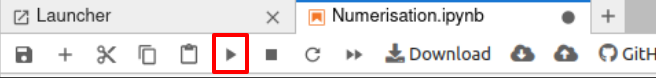


In [1]:
%pip install IPython
from IPython.display import Image
display(Image(filename='chimie_gif2.gif'))

FileNotFoundError: [Errno 2] No such file or directory: 'chimie_gif.gif'

Dans l'exemple ci-dessus, 10 ions H$⁺$ ont réagi avec 10 ions HO$^-$. Au final, il ne reste plus aucun cation H$⁺$ ni aucun ion HO$^-$, ils se sont transformés en 10 molécules d'eau H$_2$O.

Cliquer sur la flèche "play" deux fois pour avancer à la simulation suivante. Quelques extensions vont être installées temporairement, cela prend entre 30 secondes et 1 minute.

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pymunk
%pip install PIL


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 21 18:16:59 2024

@author: brian
"""
from ipywidgets import interactive,interact



import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython import get_ipython #pour l'affichage des graphes dans une fenêtre hors IDE

get_ipython().run_line_magic('matplotlib', 'inline') #affichage des graphes dans une fenêtres hors IDE



#from IPython.display import HTML

"""
import pymunk
import pymunk.pygame_util
from pymunk.vec2d import Vec2d"""



# Initialize Pygame


# Set up display
width, height = 100, 100  #en 160x160 ça va suffisamment vite
#screen = pygame.display.set_mode((width, height))
#pygame.display.set_caption("Réaction entre l'acide chlorhydrique et l'hydroxyde de sodium")
#print("alive")
# Define molecule class
class Molecule:
    def __init__(self,identity=1):
        if identity == 1 :
            self.id = 1
            self.radius = 6
            self.color = (255, 0, 0)

            self.x = random.randint(self.radius, width/2 - self.radius)

            self.mass = 17
        elif identity == 2 :
            self.id = 0
            self.radius = 2
            self.color = (255, 255, 255)
            self.x = random.randint(self.radius+width/2, width - self.radius)

            self.mass = 1
        elif identity == 3 :
            self.id = 3
            self.radius = 6
            self.color = (255, 0, 0)
            self.x = random.randint(self.radius, width - self.radius)
            self.mass = 18
        else :
            self.id = 4
            self.radius = 0
            self.color = (255, 255, 255)
            self.mass = 0.1
            self.x = random.randint(self.radius, width - self.radius)

        self.x = random.randint(self.radius, width - self.radius)
        self.y = random.randint(self.radius, height - self.radius)
        self.vx = random.uniform(-1, 1)/4
        self.vy = random.uniform(-1, 1)/4

    def __del__(self):
        pass

    def addPosition(self, posx,posy):
        self.x += posx
        self.y += posy

    def addVelocity(self, velx,vely):
        self.vx += velx
        self.vy += vely

    def move(self):
        self.x += 2*self.vx
        self.y += 2*self.vy

        # Bounce off walls
        if self.x <= self.radius or self.x >= width - self.radius:
            self.vx *= -1
            if self.x <= self.radius:
                self.x +=1
            else :
                self.x -=1
        if self.y <= self.radius or self.y >= height - self.radius:
            self.vy *= -1
            if self.y <= self.radius:
                self.y +=1
            else :
                self.y -=1

    def collide(self,p1,p2):
        dXx = p1.x-p2.x
        dXy = p1.y-p2.y
        dist = np.sqrt(dXx**2 + dXy**2)
        if dist < p1.radius+p2.radius:

            if (p1.id ==0 and p2.id == 1) or (p2.id ==0 and p1.id == 1):
                if p1.id == 1 :
                    p1.id = 3
                    p1.radius = 6
                    p1.color = (255, 0, 0)
                    p1.mass = 18
                    p2.id = 4
                    p2.radius = 0
                    p2.color = (255, 255, 255)

                else :
                    p2.id = 3
                    p2.radius = 6
                    p2.color = (255, 0, 0)
                    p2.mass = 18
                    p1.id = 4
                    p1.radius = 0
                    p1.color = (255, 255, 255)

            else :
                offset = dist-(p1.radius+p2.radius)
                p1.addPosition((-dXx/dist)*offset/2,(-dXy/dist)*offset/2)
                p2.addPosition((dXx/dist)*offset/2,(dXy/dist)*offset/2)
                total_mass = p1.mass+p2.mass
                #dv1 = -2*p2.mass/total_mass*np.inner(p1.V-p2.V,p1.X-p2.X)/np.sum((p1.X-p2.X)**2)*(p1.X-p2.X)
                scalprod1 = (p1.vx-p2.vx)*(p1.x-p2.x)+ (p1.vy-p2.vy)*(p1.y-p2.y)
                scalprod2 = (p2.vx-p1.vx)*(p2.x-p1.x)+ (p2.vy-p1.vy)*(p2.y-p1.y)

                dv1x = -2*p2.mass/total_mass*scalprod1/((p1.x-p2.x)**2+(p1.y-p2.y)**2)*(p1.x-p2.x)
                dv1y = -2*p2.mass/total_mass*scalprod1/((p1.x-p2.x)**2+(p1.y-p2.y)**2)*(p1.y-p2.y)

                dv2x = -2*p1.mass/total_mass*scalprod2/((p2.x-p1.x)**2+(p2.y-p1.y)**2)*(p2.x-p1.x)
                dv2y = -2*p1.mass/total_mass*scalprod2/((p2.x-p1.x)**2+(p2.y-p1.y)**2)*(p2.y-p1.y)


                p1.addVelocity(dv1x,dv1y)
                p2.addVelocity(dv2x,dv2y)




# Create molecules
def f(nH,nOH):
    #print(nH)
    #tot = 10
    iniH = int(nH)
    #print(iniH)
    #iniOH = tot-iniH
    iniOH =nOH
    molecules = [Molecule(2) for _ in range(iniH)] + [Molecule(1) for _ in range(iniOH)]

    # Main loop
    running = True
    i = 0

    if nH == 5 :
        imax = 2500
    else :
        imax = 1800

    subsamp = 50

    storesize=int(imax//subsamp)
    storagex=[[np.zeros(storesize)] for _ in molecules]
    storagey=[[np.zeros(storesize)] for _ in molecules]
    storestate=[[np.zeros(storesize)] for _ in molecules]

    while running:
        i += 1

        if i>=imax:
            running = False

        # Update molecule positions
        for molecule in molecules:
            molecule.move()
            for molecule2 in molecules :
                if molecule2!=molecule :
                    molecule.collide(molecule,molecule2)

        # save molecules
        #screen.fill((255, 255, 255))
        if (i-1)%subsamp == 0 :
            for molecule in range(len(molecules)):
                storagex[molecule][0][i//subsamp]=molecules[molecule].x
                storagey[molecule][0][i//subsamp]=molecules[molecule].y
                storestate[molecule][0][i//subsamp]=molecules[molecule].id




    fig, axs = plt.subplots(1,2,figsize=(15,8))


    ax = axs[0]
    scat = ax.scatter([storagex[i][0] for i in range(len(storagex))], [storagey[i][0] for i in range(len(storagex))], c="b", s=5,alpha=0)
    line2 = ax.plot([storagex[i][0] for i in range(len(storagex))], [storagey[i][0] for i in range(len(storagex))],alpha=0)[0]

    noms = ['HO$^-$', 'H$⁺$', 'H$_2$O']
    #bar_labels = ['HO$^-$', 'H$⁺$', 'H$_2$O']
    bar_labels_init = ['HO$^-$ initial', 'H$⁺$ initial']
    bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

    axs[1].tick_params(axis='both', which='major', labelsize=20)
    axs[1].tick_params(axis='both', which='minor', labelsize=30)


    vshift = 3
    hshift = 4.5

    def update(p):

        X = [storagex[_][0][p] for _ in range(len(storagex))]
        Y =  [storagey[_][0][p] for _ in range(len(storagex))]
        idy = [storestate[_][0][p] for _ in range(len(storagex))]

        ax.clear()

        X1 = np.array([X[_] for _ in range(len(X)) if idy[_]==1])
        Y1 = np.array([Y[_] for _ in range(len(X)) if idy[_]==1])

        minis=120*2
        bigs = 4*120*2

        ax.set(xlim=[0, width], ylim=[0, height])

        ax.scatter(X1,Y1, color=(0,0,0), s=bigs*1.3,alpha=1)
        ax.scatter(X1,Y1, color=(1,0,0), s=bigs*1,alpha=1)

        ax.scatter(X1+hshift,Y1-vshift, color=(0,0,0), s=minis*1.3,alpha=1)
        ax.scatter(X1+hshift,Y1-vshift, color=(1,1,1), s=minis*1,alpha=1)

        X2 = np.array([X[_] for _ in range(len(X)) if idy[_]==0])
        Y2 = np.array([Y[_] for _ in range(len(X)) if idy[_]==0])


        ax.scatter(X2,Y2, color=(0,0,0), s=minis*1.3,alpha=1)
        ax.scatter(X2,Y2, color=(1,1,1), s=minis,alpha=1)


        X3 = np.array([X[_] for _ in range(len(X)) if idy[_]==3])
        Y3 = np.array([Y[_] for _ in range(len(X)) if idy[_]==3])

        ax.scatter(X3,Y3, color=(0,0,0), s=bigs*1.3,alpha=1)
        ax.scatter(X3,Y3, color=(1,0,0), s=bigs,alpha=1)

        ax.scatter(X3+hshift,Y3-vshift, color=(0,0,0), s=minis*1.3,alpha=1)
        ax.scatter(X3+hshift,Y3-vshift, color=(1,1,1), s=minis,alpha=1)

        ax.scatter(X3-hshift,Y3-vshift, color=(0,0,0), s=minis*1.3,alpha=1)
        ax.scatter(X3-hshift,Y3-vshift, color=(1,1,1), s=minis,alpha=1)

        counts = [len(X1), len(X2), len(X3)]

        axs[1].clear()
        axs[1].bar(noms[:2], [iniOH,iniH], label=bar_labels_init, color=['w','w','w'],linewidth=3,edgecolor=bar_colors,alpha=0.5)
        axs[1].bar(noms, counts,  color=bar_colors)



        axs[1].set_ylabel('Nombre d\'entités',fontsize = 30)
        axs[1].set_title('Évolution du nombre d\'entités',fontsize = 30)
        axs[1].legend(loc='upper right',fontsize = 30)
        axs[1].set_ylim([0, max([iniH,iniOH])*1.4])
        return (scat,line2)



    print("Calcul terminé, Affichage graphique en cours")

    positions = [i for i in range(len(storagex[0][0]))]


    anim = animation.FuncAnimation(
        fig,
        update,
        frames=positions,
        interval=30,
        blit=True,
    )

    plt.close(fig)

    f = r"animation.gif"
    writergif = animation.PillowWriter(fps=30)
    anim.save(f, writer=writergif)


    #print("100%")

    from IPython.display import Image
    from IPython.display import display

    import PIL.Image as pilimg
    from PIL import ImageSequence


    # Specify the path to your existing animated GIF file
    input_gif_path = "animation.gif"
    output_gif_path = "animation.gif"

    # Open the existing animated GIF file
    with pilimg.open(input_gif_path) as img:
        # Set the loop count to 1 (loop only once)
        img.info["loop"] = 0

        # Modify the duration of each frame (set to 100 milliseconds for example)
        frames = [frame.copy() for frame in ImageSequence.Iterator(img)]
        for frame in frames:
            frame.info["duration"] = 25  # Set the duration in milliseconds

        # Save the modified GIF
        img.save(output_gif_path, save_all=True, append_images=frames, loop=1)


    display(Image(filename='animation.gif'))



interactive_plot = interactive(f, nH=(1, 9,1),nOH=(1, 9,1))
#output = interactive_plot.children[-1]
#output.layout.height = '700px'
interactive_plot



interactive(children=(IntSlider(value=5, description='nH', max=9, min=1), IntSlider(value=5, description='nOH'…

nH est le nombre d'ions H$⁺$ initiaux, et nOH est le nombre initial d'ions OH$^-$. Le graphique à droite montre l'évolution du nombre de chaque molécule durant la simulation.

Le **réactif limitant** est le réactif qui est totalement consommé en fin de réaction.

Faire varier nH et nOH. Pendant l'affichage du graphique, entraînez-vous à essayer de prévoir le réactif limitant, puis le nombre de molécules de chaque espèce à la fin de la réaction!